PBDE Simulation (newest code by Susan) analysis :D

In [1]:
import cmocean.cm as cm
import copy
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import matplotlib.gridspec as gridspec
import pandas as pd

In [2]:
#data = xr.open_dataset('/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_5_days.zarr')
#data = xr.open_dataset('/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_20_days.zarr')
#data = xr.open_dataset('/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0172022_run_60_days.zarr')
#filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days.zarr'
#filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_60_days.zarr'
#filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_90_days.zarr'
#filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_60_days_no_buried.zarr'
#filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_180_days_no_buried_tau_crit_5e-4_upwards_from_bottom_added.zarr'
#filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days_no_buried_tau_crit_5e-4_upwards_from_bottom_added.zarr'
#filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days_no_buried_tau_crit_1e-2_upwards_updated_added.zarr'
filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days_no_buried_tau_crit_1e-2_upwards_testing.zarr'
data = xr.open_dataset(filename)
#
nobs = data.obs.shape[0]
ntraj = data.trajectory.shape[0]
data.z

/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


<xarray.DataArray 'z' (trajectory: 360, obs: 2190)> Size: 6MB
[788400 values with dtype=float64]
Coordinates:
  * obs         (obs) int32 9kB 0 1 2 3 4 5 6 ... 2184 2185 2186 2187 2188 2189
  * trajectory  (trajectory) int64 3kB 0 1 2 3 4 5 6 ... 354 355 356 357 358 359
Attributes:
    long_name:      
    positive:       down
    standard_name:  depth
    units:          m

In [3]:
print (nobs, ntraj)

2190 360


# REGIONAL ANALYSIS

In [4]:
import Regions_functions
from Regions_functions import vertical_mean_total_profiles, vertical_status_profiles, plot_vertical_total_state_profiles, plot_vertical_state_status

In [5]:
polygon_dict = Regions_functions.polygon_definition(filename)

In [6]:
_ , vertical_N1_total = vertical_mean_total_profiles(polygon_dict['N1'], 80)
_ , vertical_N2_total = vertical_mean_total_profiles(polygon_dict['N2'], 80)
_ , vertical_C1_total = vertical_mean_total_profiles(polygon_dict['C1'], 80)
_ , vertical_S1_total = vertical_mean_total_profiles(polygon_dict['S1'], 80)
_ , vertical_S2_total = vertical_mean_total_profiles(polygon_dict['S2'], 80)
_ , vertical_H1_total = vertical_mean_total_profiles(polygon_dict['H1'], 80)
_ , vertical_J1_total = vertical_mean_total_profiles(polygon_dict['J1'], 80)
_ , vertical_F1_total = vertical_mean_total_profiles(polygon_dict['F1'], 80)
_ , vertical_HW1_total = vertical_mean_total_profiles(polygon_dict['HW1'], 80)
####################### Status ###############################################
status_vertical_N1 = vertical_status_profiles(polygon_dict['N1'], 80)
status_vertical_N2 = vertical_status_profiles(polygon_dict['N2'], 80)
status_vertical_C1 = vertical_status_profiles(polygon_dict['C1'], 80)
status_vertical_S1 = vertical_status_profiles(polygon_dict['S1'], 80)
status_vertical_S2 = vertical_status_profiles(polygon_dict['S2'], 80)
status_vertical_H1 = vertical_status_profiles(polygon_dict['H1'], 80)
status_vertical_J1 = vertical_status_profiles(polygon_dict['J1'], 80)
status_vertical_F1 = vertical_status_profiles(polygon_dict['F1'], 80)
status_vertical_HW1 = vertical_status_profiles(polygon_dict['HW1'], 80)

In [7]:
perfiles_vertical_total = [vertical_N1_total, vertical_N2_total, vertical_C1_total, vertical_S1_total
                          , vertical_S2_total, vertical_H1_total, vertical_J1_total, vertical_F1_total
                          , vertical_HW1_total]
###################### Status #########################
status_profiles = [status_vertical_N1, status_vertical_N2, status_vertical_C1
                   , status_vertical_S1, status_vertical_S2, status_vertical_H1, 
                   status_vertical_J1, status_vertical_F1, status_vertical_HW1]

Status sedimented and watercolumn exlusively per region

In [8]:
regions_water, regions_sedimented = Regions_functions.status_states_regions_map(polygon_dict)
####### regions ########
# written like N1_sedimented_lon, N1_sedimented_lat 
#
region_names = ['N1', 'N2', 'C1', 'S1', 'S2', 'H1', 'J1', 'F1', 'HW1']

water_regions_lon = [regions_water[region]['lon'] for region in region_names]
water_regions_lat = [regions_water[region]['lat'] for region in region_names]
water_regions_depth = [regions_water[region]['depth'] for region in region_names]

sedimented_regions_lon = [regions_sedimented[region]['lon'] for region in region_names]
sedimented_regions_lat = [regions_sedimented[region]['lat'] for region in region_names]
sedimented_regions_depth = [regions_sedimented[region]['depth'] for region in region_names]


Depths plot

Text(0.5, 1.0, 'Mean depth per region')

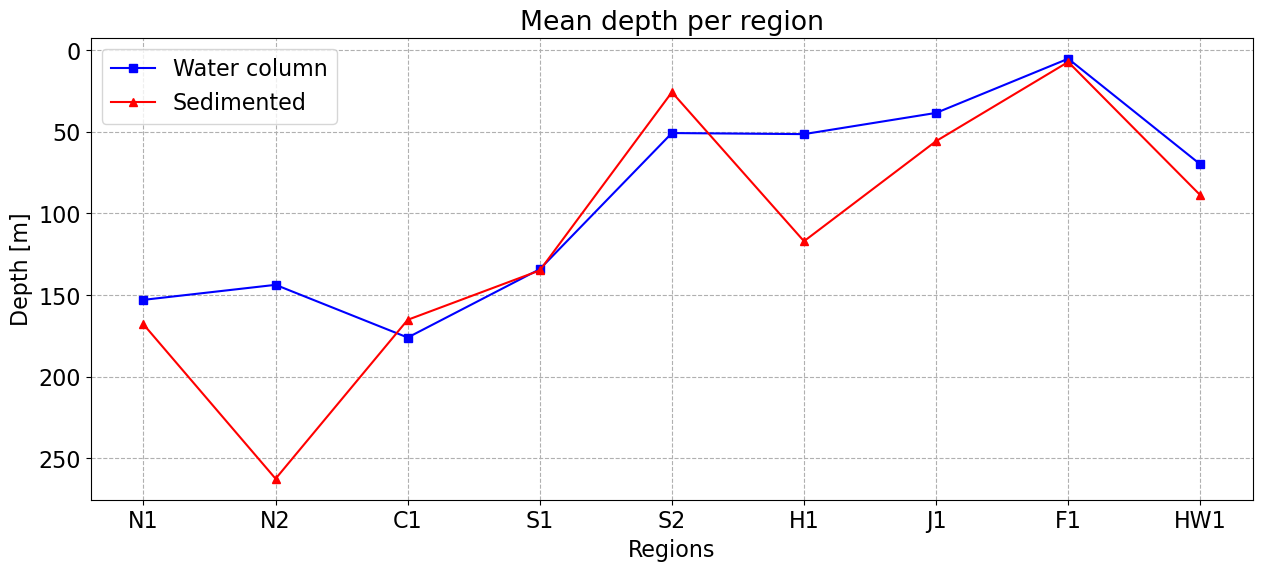

In [57]:
mean_depths_region_water = np.zeros(len(region_names))
mean_depths_region_sediment = np.zeros(len(region_names))
for i in range(0,len(region_names)):
    mean_depths_region_water[i] = np.nanmean(water_regions_depth[i])
    mean_depths_region_sediment[i] = np.nanmean(sedimented_regions_depth[i])
############################################################################
fig, ax = plt.subplots(figsize = (15,6)) 
ax.plot(region_names,mean_depths_region_water, 's-b', label ='Water column')   
ax.plot(region_names,mean_depths_region_sediment, '^-r', label = 'Sedimented') 
ax.invert_yaxis() 
#
ax.legend(loc = 'upper left')
ax.grid(linestyle = '--')
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Regions') 
ax.set_title('Mean depth per region')

In [9]:
sum_water_N1 = status_vertical_N1['Particles Status 2'].sum() + status_vertical_N1['Particles Status 3'].sum()
sum_water_S1 = status_vertical_S1['Particles Status 2'].sum() + status_vertical_S1['Particles Status 3'].sum()
ratio_N1_S1 = sum_water_N1 / sum_water_S1
print(ratio_N1_S1)

0.31924068957783236


As the results shown by Sun et. al (2023), the K_scav constant got by the model agrees within the ranges of values obtained in the paper.

(particles_watercolumn_N1 / particles_watercolumn_S1) = 0.0324 for 60 days run

In the paper they got 0.038 +- 0.014 day $^{-1}$ ---> (NSoG / SSoG) / (60)

In [10]:
status_label = ['Particles Status 1', 'Particles Status 2', 'Particles Status 3', 'Particles Status 11', 'Particles Status 12', 'Particles Status 13', 'Particles Status 21', 'Particles Status 22', 'Particles Status 23']
states = ['Sewage Water', 'Colloidal Water', 'Marine Water', 'Sewage Sedimented', 'Colloidal Sedimented', 'Marine Sedimented', 'Sewage Buried', 'Colloidal Buried', 'Marine Buried']
colors = ['r', 'b', 'c', 'g', 'tab:orange', 'y', 'm', 'tab:brown', 'tab:gray']
regions = ['N1', 'N2', 'C1', 'S1', 'S2', 'H1', 'J1', 'F1', 'HW1']

In [11]:
#Regions_functions.plot_vertical_status_profiles(status_label, status_profiles, states, colors, regions, data)

Combine the two last plots adding the amount of particles in the water column and sedimented

/ocean/vvalenzuela/MOAD/analysis-vicente/Ocean_Parcels/PBDE_simulations/Regions_functions.py:608: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax_map.pcolormesh(nav_lon, nav_lat, tmask, cmap=cmap, shading='auto')
/ocean/vvalenzuela/MOAD/analysis-vicente/Ocean_Parcels/PBDE_simulations/Regions_functions.py:608: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax_map.pcolormesh(nav_lon, nav_lat, tmask, cmap=cmap, shading='auto')
/ocean/vvalenzuela/MOAD/analysis-vicente/Ocean_Parcels/PBDE_simulations/Regions_functions.py:608: UserWarning: The input coordinates to pcolormesh are interpret

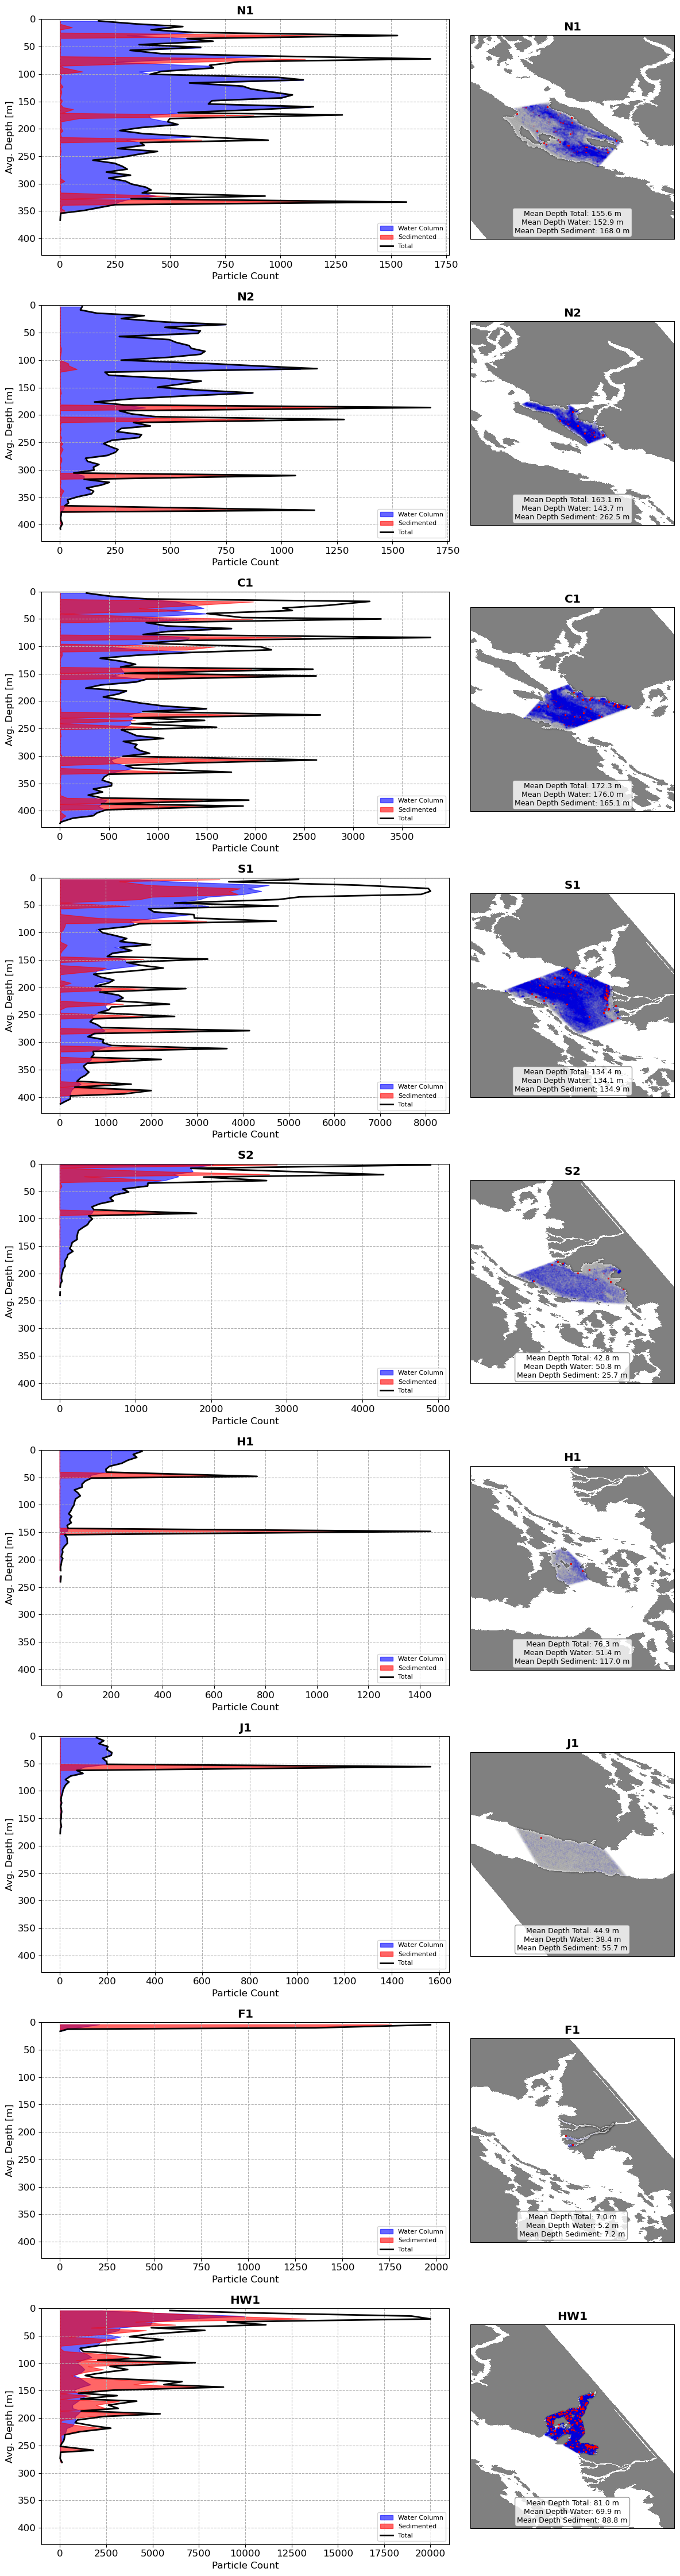

In [12]:
plot_vertical_total_state_profiles(perfiles_vertical_total, status_profiles,
                                   water_regions_lon, water_regions_lat,
                                   sedimented_regions_lon, sedimented_regions_lat, 
                                   water_regions_depth, sedimented_regions_depth)

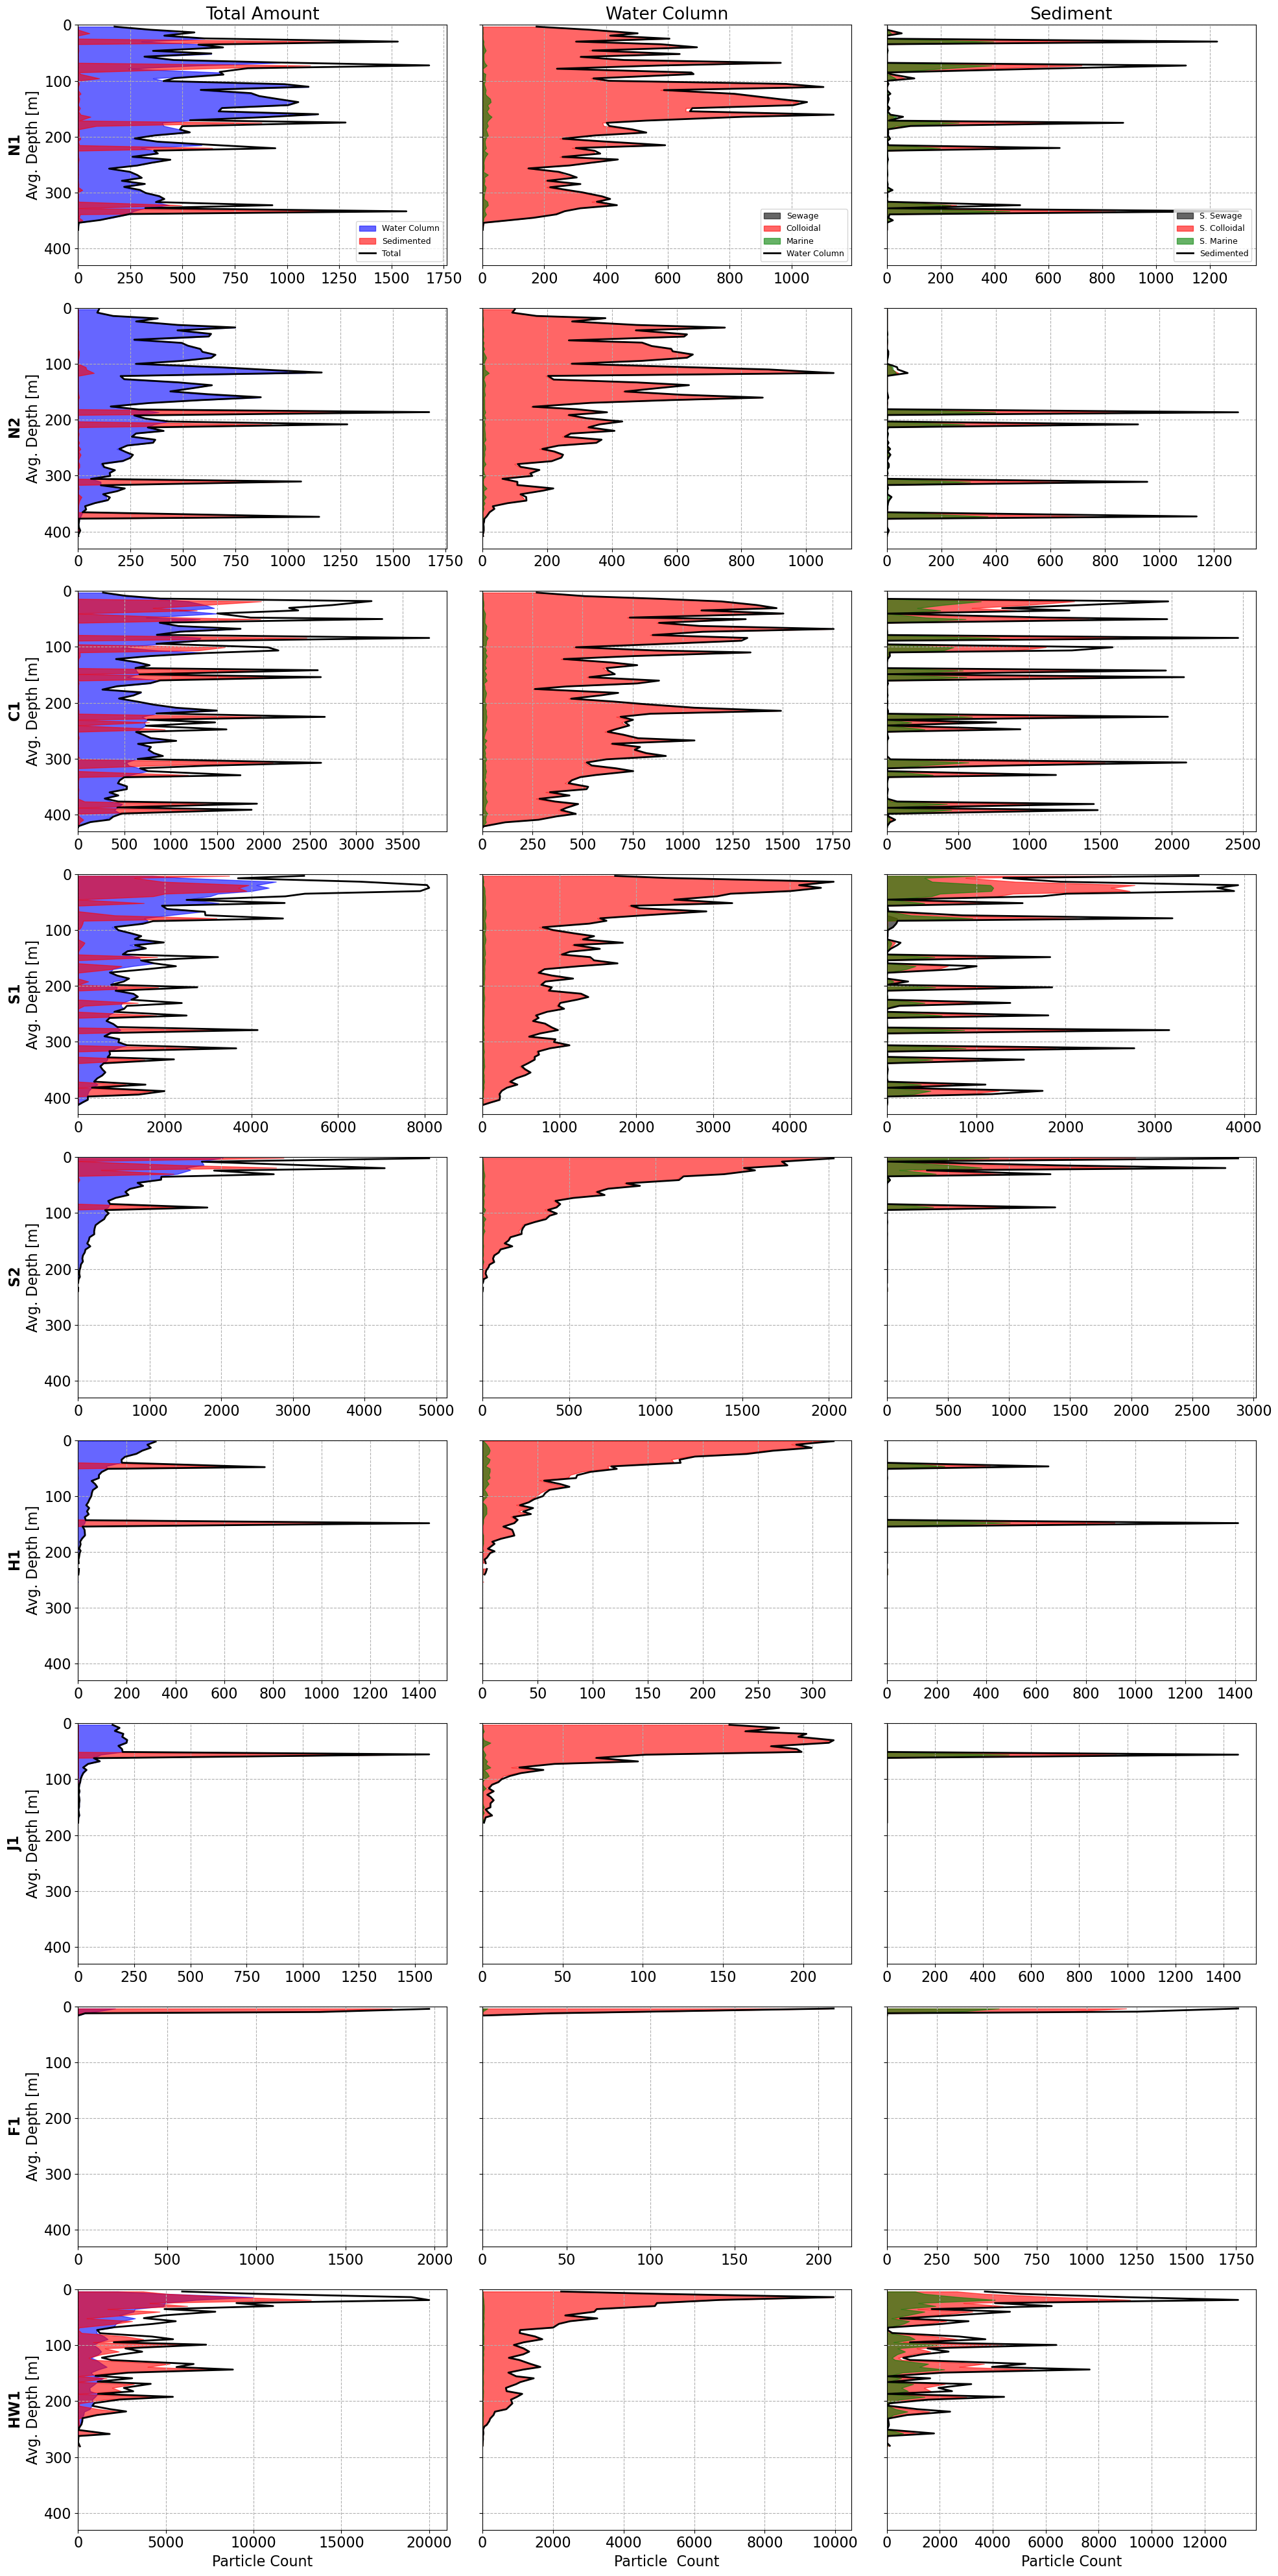

In [13]:
plot_vertical_state_status(perfiles_vertical_total, status_profiles)

Bar plots by region

In [14]:
regions = ['N1', 'N2', 'C1', 'S1', 'S2', 'H1', 'J1', 'F1', 'HW1']

Water column

In [15]:
bar_regions_sewage_water = [status_vertical_N1['Particles Status 1'].sum(), status_vertical_N2['Particles Status 1'].sum()
                            , status_vertical_C1['Particles Status 1'].sum(), status_vertical_S1['Particles Status 1'].sum()
                            , status_vertical_S2['Particles Status 1'].sum(), status_vertical_H1['Particles Status 1'].sum()
                            , status_vertical_J1['Particles Status 1'].sum(), status_vertical_F1['Particles Status 1'].sum()
                            , status_vertical_HW1['Particles Status 1'].sum()]
#
bar_regions_colloidal_water = [status_vertical_N1['Particles Status 2'].sum(), status_vertical_N2['Particles Status 2'].sum()
                            , status_vertical_C1['Particles Status 2'].sum(), status_vertical_S1['Particles Status 2'].sum()
                            , status_vertical_S2['Particles Status 2'].sum(), status_vertical_H1['Particles Status 2'].sum()
                            , status_vertical_J1['Particles Status 2'].sum(), status_vertical_F1['Particles Status 2'].sum()
                            , status_vertical_HW1['Particles Status 2'].sum()]
#
bar_regions_marine_water = [status_vertical_N1['Particles Status 3'].sum(), status_vertical_N2['Particles Status 3'].sum()
                            , status_vertical_C1['Particles Status 3'].sum(), status_vertical_S1['Particles Status 3'].sum()
                            , status_vertical_S2['Particles Status 3'].sum(), status_vertical_H1['Particles Status 3'].sum()
                            , status_vertical_J1['Particles Status 3'].sum(), status_vertical_F1['Particles Status 3'].sum()
                            , status_vertical_HW1['Particles Status 3'].sum()]

Sediment

In [16]:
bar_regions_sewage_sediment = [status_vertical_N1['Particles Status 11'].sum(), status_vertical_N2['Particles Status 11'].sum()
                            , status_vertical_C1['Particles Status 11'].sum(), status_vertical_S1['Particles Status 11'].sum()
                            , status_vertical_S2['Particles Status 11'].sum(), status_vertical_H1['Particles Status 11'].sum()
                            , status_vertical_J1['Particles Status 11'].sum(), status_vertical_F1['Particles Status 11'].sum()
                            , status_vertical_HW1['Particles Status 11'].sum()]
#
bar_regions_colloidal_sediment = [status_vertical_N1['Particles Status 12'].sum(), status_vertical_N2['Particles Status 12'].sum()
                            , status_vertical_C1['Particles Status 12'].sum(), status_vertical_S1['Particles Status 12'].sum()
                            , status_vertical_S2['Particles Status 12'].sum(), status_vertical_H1['Particles Status 12'].sum()
                            , status_vertical_J1['Particles Status 12'].sum(), status_vertical_F1['Particles Status 12'].sum()
                            , status_vertical_HW1['Particles Status 12'].sum()]
#
bar_regions_marine_sediment = [status_vertical_N1['Particles Status 13'].sum(), status_vertical_N2['Particles Status 13'].sum()
                            , status_vertical_C1['Particles Status 13'].sum(), status_vertical_S1['Particles Status 13'].sum()
                            , status_vertical_S2['Particles Status 13'].sum(), status_vertical_H1['Particles Status 13'].sum()
                            , status_vertical_J1['Particles Status 13'].sum(), status_vertical_F1['Particles Status 13'].sum()
                            , status_vertical_HW1['Particles Status 13'].sum()]

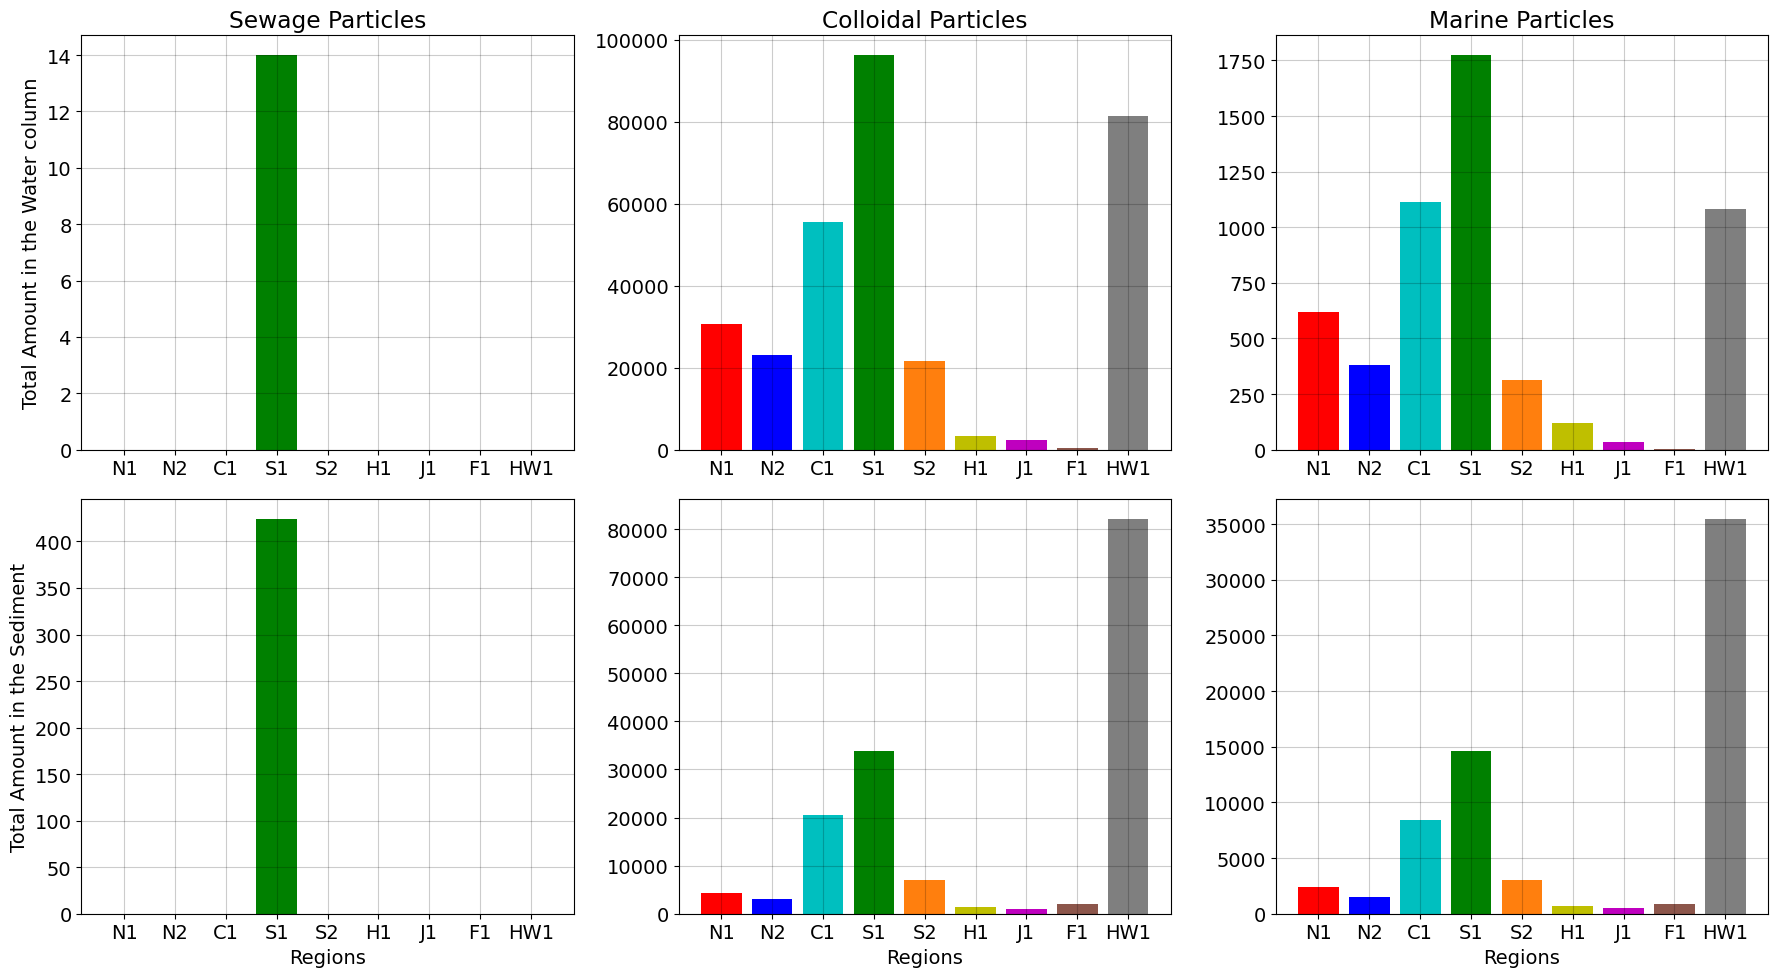

In [17]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(2, 3, figsize = (18,10))
#
# Water column
ax[0,0].bar(regions, bar_regions_sewage_water, color = colors)
ax[0,1].bar(regions, bar_regions_colloidal_water, color = colors) 
ax[0,2].bar(regions, bar_regions_marine_water, color = colors)
#

#
# Sediment  
ax[1,0].bar(regions, bar_regions_sewage_sediment, color = colors)
ax[1,1].bar(regions, bar_regions_colloidal_sediment, color = colors) 
ax[1,2].bar(regions, bar_regions_marine_sediment, color = colors)  
##
#
ax[0,0].set_ylabel('Total Amount in the Water column'); ax[1,0].set_ylabel('Total Amount in the Sediment')
ax[1,0].set_xlabel('Regions'); ax[1,1].set_xlabel('Regions'); ax[1,2].set_xlabel('Regions')
#
ax[0,0].set_title('Sewage Particles'); ax[0,1].set_title('Colloidal Particles'); ax[0,2].set_title('Marine Particles')
#
for ax in ax.flat:
    ax.grid(True, color ='k', alpha = .2)
plt.tight_layout()

Volumes and concentrations

In [18]:
volumes_regions, _ = Regions_functions.volumes()

Text(0, 0.5, 'Volume ($m^3$)')

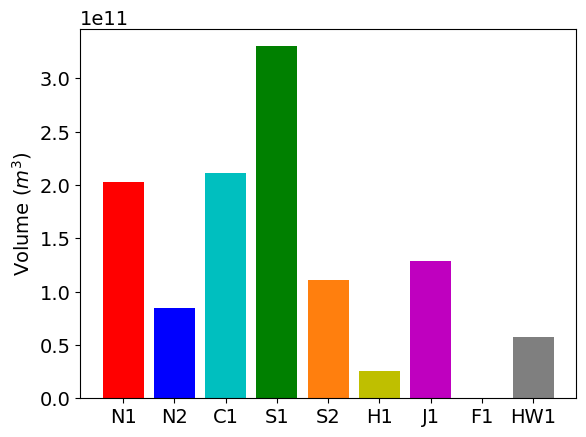

In [19]:
plt.bar(regions, volumes_regions, color = colors)
plt.ylabel('Volume ($m^3$)')

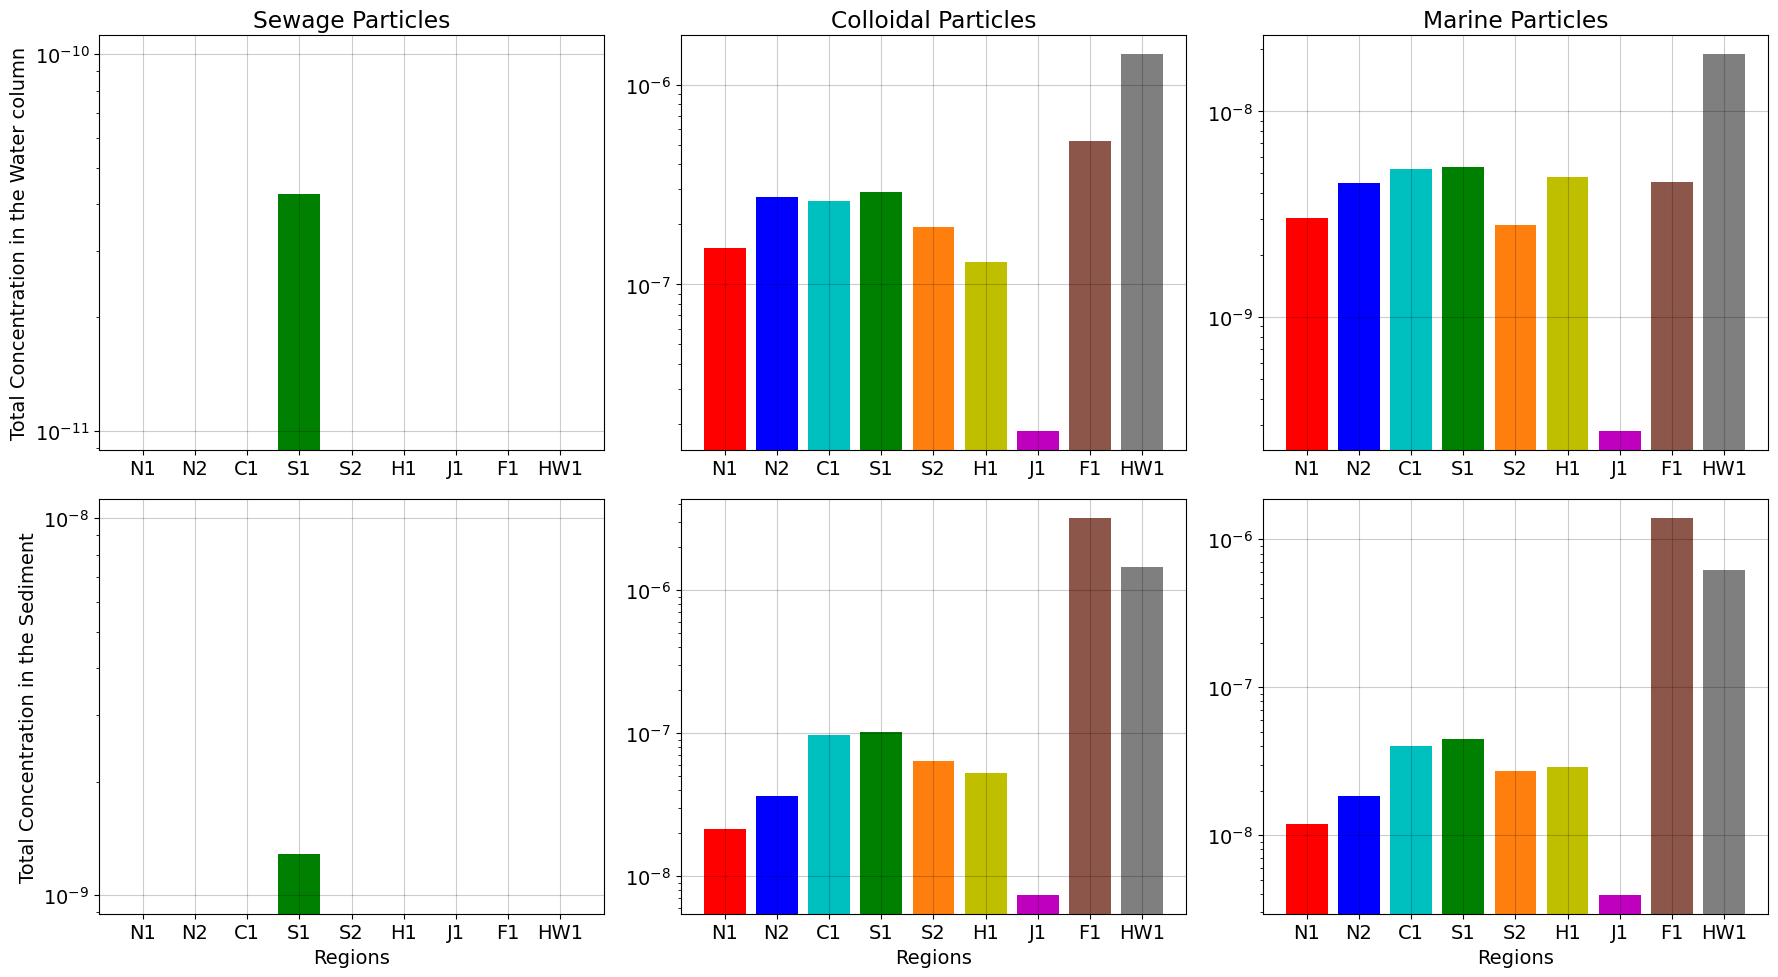

In [20]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(2, 3, figsize=(18, 10))

# Water column
ax[0, 0].bar(regions, np.array(bar_regions_sewage_water) / np.array(volumes_regions), color=colors)
ax[0, 1].bar(regions, np.array(bar_regions_colloidal_water) / np.array(volumes_regions), color=colors)
ax[0, 2].bar(regions, np.array(bar_regions_marine_water) / np.array(volumes_regions), color=colors)

# Sediment
ax[1, 0].bar(regions, np.array(bar_regions_sewage_sediment) / np.array(volumes_regions), color=colors)
ax[1, 1].bar(regions, np.array(bar_regions_colloidal_sediment) / np.array(volumes_regions), color=colors)
ax[1, 2].bar(regions, np.array(bar_regions_marine_sediment) / np.array(volumes_regions), color=colors)
#
ax[0, 0].set_ylabel('Total Concentration in the Water column')
ax[1, 0].set_ylabel('Total Concentration in the Sediment')
ax[1, 0].set_xlabel('Regions')
ax[1, 1].set_xlabel('Regions')
ax[1, 2].set_xlabel('Regions')
ax[0, 0].set_title('Sewage Particles')
ax[0, 1].set_title('Colloidal Particles')
ax[0, 2].set_title('Marine Particles')

# log scale
for a in ax.flat:
    a.set_yscale('log')
    a.grid(True, color='k', alpha=0.2)

plt.tight_layout()
plt.show()



Ratio in concentrations between NSoG and SSoG


In the paper they got 0.038 +- 0.014 day $^{-1}$ ---> (NSoG / SSoG) / (60)

In [21]:
water_N1_con = np.array(bar_regions_colloidal_water[0]) / np.array(volumes_regions[0]) + np.array(bar_regions_marine_water[0]) / np.array(volumes_regions[0])
water_S1_con = np.array(bar_regions_colloidal_water[3]) / np.array(volumes_regions[3]) + np.array(bar_regions_marine_water[3]) / np.array(volumes_regions[3])
N1_S1_ratio = water_N1_con / water_S1_con
print(N1_S1_ratio)

0.5204152213170994


Lets see how particles expand in the sediment

In [22]:
data_sediment = data.status.where(data.status > 10)
lat_sediment = data.lat.where(data.status > 10)
lon_sediment = data.lon.where(data.status > 10)

In [23]:
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')
cm_deep = copy.copy(cm.deep)
cm_deep.set_bad('k')

In [24]:
# To get the indexes of last month
start_time = pd.Timestamp('2022-01-01 00:00')
time_index = pd.date_range(start=start_time, periods=2190, freq='4H')

df = pd.DataFrame(index=time_index)
df['datetime'] = df.index  

last_times = df.resample('M').last()['datetime']

indices = df[df['datetime'].isin(last_times)].index.to_list()
#
integer_indices = [df.index.get_loc(ts) for ts in indices]

/tmp/ipykernel_58716/2822038562.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_index = pd.date_range(start=start_time, periods=2190, freq='4H')
/tmp/ipykernel_58716/2822038562.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  last_times = df.resample('M').last()['datetime']


In [25]:
integer_indices

[185, 353, 539, 719, 905, 1085, 1271, 1457, 1637, 1823, 2003, 2189]

/tmp/ipykernel_58716/2687848183.py:25: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry, cmap=cm_deep, shading='auto')
/tmp/ipykernel_58716/2687848183.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


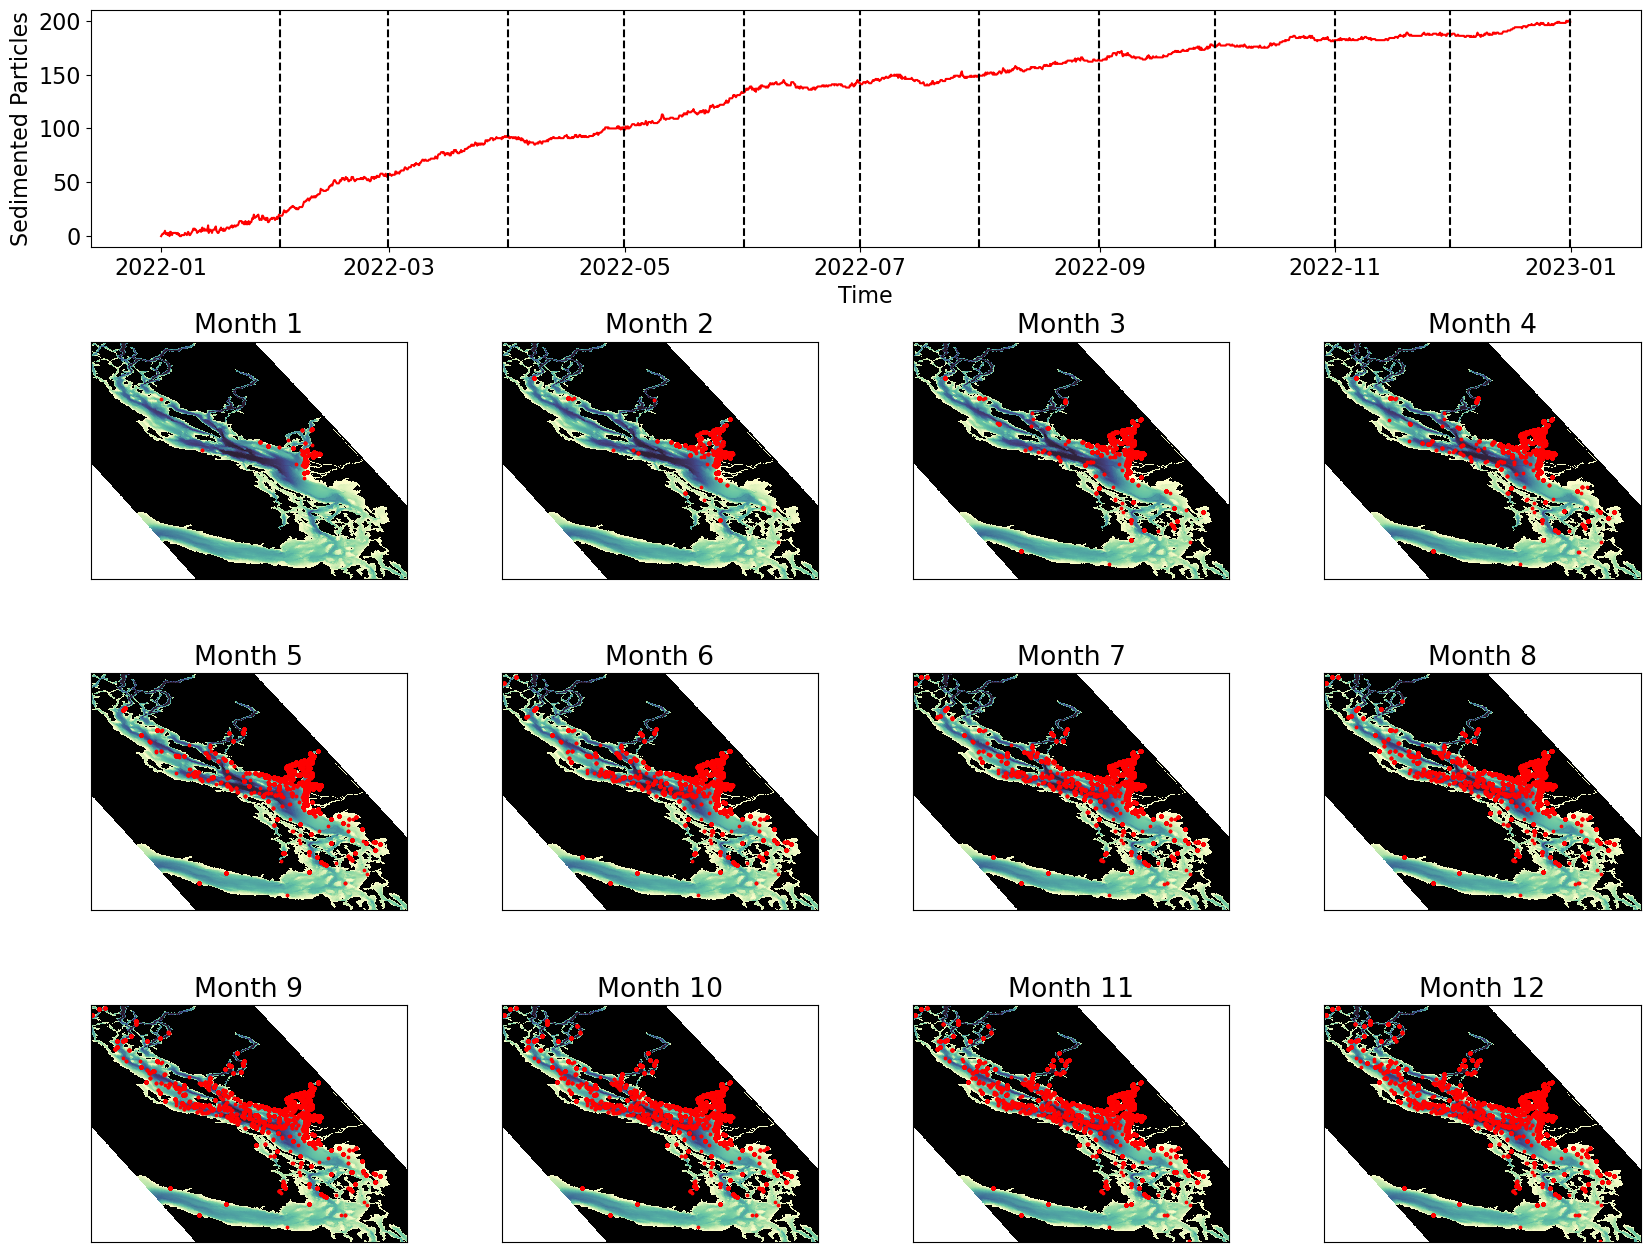

In [26]:
plt.rcParams.update({'font.size': 16})

fig = plt.figure(figsize=(20, 16))
gs = gridspec.GridSpec(4, 4, hspace=0.4, wspace=0.3)

ax_ts = fig.add_subplot(gs[0, :])  
ax_ts.plot(data.time[0, :], np.count_nonzero(data_sediment > 10, axis=0), color='r')

for month in range(12):
    idx = integer_indices[month]
    time_val = pd.Timestamp(data.time[0, idx].values)
    ax_ts.axvline(time_val, color='k', linestyle='--')
#
ax_ts.set_xlabel('Time')
ax_ts.set_ylabel('Sedimented Particles')

for month in range(12):
    row = 1 + (month // 4) 
    col = month % 4
    ax = fig.add_subplot(gs[row, col])
    
    idx = integer_indices[month]

    # Bathymetry
    ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry, cmap=cm_deep, shading='auto')
    ax.set_xlim(-125.4, -122.3)
    ax.set_ylim(48, 50.5)
    
    # Sedimented particles
    ax.scatter(lon_sediment[:, :idx], lat_sediment[:, :idx], c='red', s=3)
    ax.set_title(f'Month {month+1}')
    ax.tick_params(
        which='both', bottom=False, top=False, left=False, right=False,
        labelbottom=False, labelleft=False,
    )

plt.tight_layout()
plt.show()


Lets create a table with the metrics

In [27]:
data = xr.open_dataset(filename)

/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Proportions

In [28]:
#
colloidal_water = []
marine_water = [] 
sewage_water = []
initial = []
colloidal_sediment = []
marine_sediment = []
sewage_sediment = []
particles_out = []
total = []
#
for i in range(len(data.obs)):
    len_initial = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] < 0.))[0])
    len_1 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 1.))[0])
    len_2 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 2.))[0])
    len_3 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 3.))[0])
    len_11 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 11.))[0])
    len_12 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 12.))[0])
    len_13 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 13.))[0])
    len_out = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 7.))[0])
    #
    len_T = np.count_nonzero(~np.isnan(data.status[:, i]))
    #
    colloidal_water.append(len_2)
    marine_water.append(len_3) 
    sewage_water.append(len_1)
    initial.append(len_initial)
    colloidal_sediment.append(len_12)
    marine_sediment.append(len_13)
    sewage_sediment.append(len_11)
    particles_out.append(len_out)
    total.append(len_T)
#    
proportion_initial = np.array(initial)/np.array(total) *100
#
proportion_colloidal_water = np.array(colloidal_water)/np.array(total) *100
proportion_marine_water = np.array(marine_water)/np.array(total) *100
proportion_sewage_water = np.array(sewage_water)/np.array(total) *100
#
proportion_colloidal_sediment = np.array(colloidal_sediment)/np.array(total) *100
proportion_marine_sediment = np.array(marine_sediment)/np.array(total) *100
proportion_sewage_sediment = np.array(sewage_sediment)/np.array(total) *100
#
proportion_out = np.array(particles_out)/np.array(total) *100

In [29]:
ratio_MC_Water = proportion_marine_water / proportion_colloidal_water
ratio_MC_Sediment = proportion_marine_sediment / proportion_colloidal_sediment
print(ratio_MC_Water[-1])
print(ratio_MC_Sediment[-1])

0.020833333333333332
0.4014084507042253


/tmp/ipykernel_58716/413738116.py:1: RuntimeWarning: invalid value encountered in divide
  ratio_MC_Water = proportion_marine_water / proportion_colloidal_water
/tmp/ipykernel_58716/413738116.py:2: RuntimeWarning: divide by zero encountered in divide
  ratio_MC_Sediment = proportion_marine_sediment / proportion_colloidal_sediment
/tmp/ipykernel_58716/413738116.py:2: RuntimeWarning: invalid value encountered in divide
  ratio_MC_Sediment = proportion_marine_sediment / proportion_colloidal_sediment


In [30]:
data_water = data.where((data.status > 0) & (data.status < 4))
data_sediment = data.where(data.status > 10)

In [31]:
data_sediment.z.mean().values

array(110.10851626)

In [32]:
depth_mean_water = data_water.z.mean().values
depth_mean_sediment = data_sediment.z.mean().values

/tmp/ipykernel_58716/408882608.py:4: RuntimeWarning: divide by zero encountered in divide
  ax.plot(time_axis,proportion_marine_sediment / proportion_colloidal_sediment, label='Sediment', c = 'g')
/tmp/ipykernel_58716/408882608.py:4: RuntimeWarning: invalid value encountered in divide
  ax.plot(time_axis,proportion_marine_sediment / proportion_colloidal_sediment, label='Sediment', c = 'g')
/tmp/ipykernel_58716/408882608.py:9: RuntimeWarning: invalid value encountered in divide
  axins.plot(time_axis, proportion_marine_water / proportion_colloidal_water, label='Water Column', c = 'b')


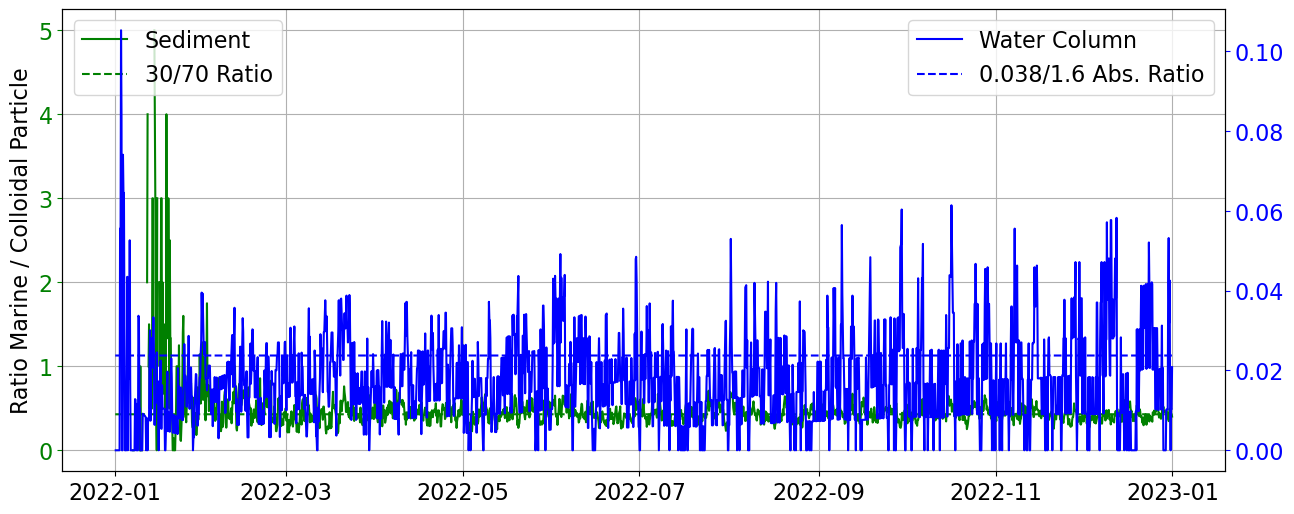

In [33]:
# Ratios in water column, sediment and buried
fig, ax = plt.subplots(figsize = (15,6))
time_axis = data.time[0,:]
ax.plot(time_axis,proportion_marine_sediment / proportion_colloidal_sediment, label='Sediment', c = 'g')
ax.plot(data.time[0, :], 30/70. * np.ones_like(data.status[0, :]), '--', c='g', label = '30/70 Ratio')

#ax.plot(time_axis, proportion_marine_buried / proportion_colloidal_buried, label='Buried', c = 'tab:brown')
axins = ax.twinx()
axins.plot(time_axis, proportion_marine_water / proportion_colloidal_water, label='Water Column', c = 'b')
axins.plot(data.time[0, :], 0.038/1.6 * np.ones_like(data.status[0, :]), '--', c='b', label = '0.038/1.6 Abs. Ratio')
#
ax.tick_params(axis='y', colors='green')
axins.tick_params(axis='y', colors='blue')

#
ax.set_ylabel('Ratio Marine / Colloidal Particle')
ax.grid();
ax.legend(loc = 'upper left');
axins.legend(loc = 'upper right');

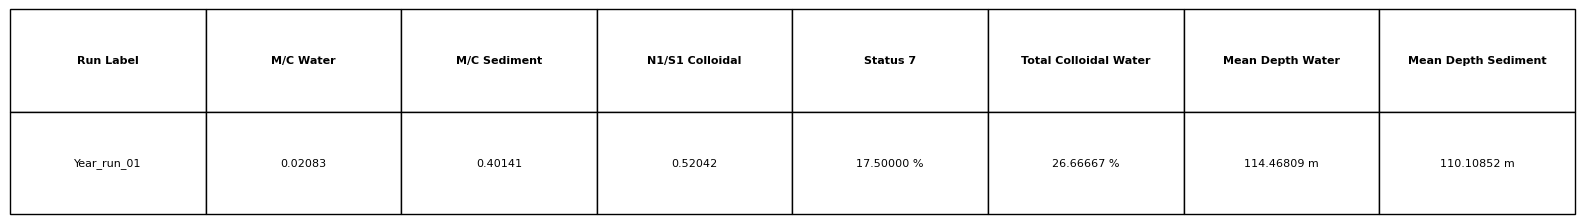

In [34]:
column_labels = ['Run Label','M/C Water', 'M/C Sediment', 'N1/S1 Colloidal', 'Status 7',
                'Total Colloidal Water', 'Mean Depth Water', 'Mean Depth Sediment'
]
#
metrics = ['Year_run_01',
    f"{ratio_MC_Water[-1]:.5f}",
    f"{ratio_MC_Sediment[-1]:.5f}",
    f"{N1_S1_ratio:.5f}",
    f"{proportion_out[-1]:.5f} %",
    f"{proportion_colloidal_water[-1]:.5f} %",
    f"{depth_mean_water:.5f} m",
    f"{depth_mean_sediment:.5f} m"
]
#
fig, ax = plt.subplots(figsize=(16, 3))  
ax.axis("off")
#
#
table = ax.table(
    cellText=[metrics],
    colLabels=column_labels,
    loc="center",
    cellLoc="center"
)
#
for (row, col), cell in table.get_celld().items():
    cell.set_fontsize(50)
    cell.set_height(0.3)
    if row == 0:
        cell.set_text_props(weight='bold')
#
table.scale(1.2, 2.5)
plt.tight_layout()
plt.show()

